In [10]:
# %pip install -r requirements.txt
from pathlib import Path
import pandas as pd
import json

BASE = Path(".")


In [14]:
import subprocess, sys
subprocess.run([sys.executable, "src/pipeline.py", "--model", "xgb", "--balance", "smote", "--threshold", "0.3"])


CompletedProcess(args=['/bin/python3', 'src/pipeline.py', '--model', 'xgb', '--balance', 'smote', '--threshold', '0.3'], returncode=0)

In [15]:
kpi = pd.read_csv("outputs/tables/dashboard_metrics.csv")
kpi


,roc_auc,pr_auc,precision_at_threshold,recall_at_threshold,threshold
0,0.98038,0.876309,0.647059,0.897959,0.3


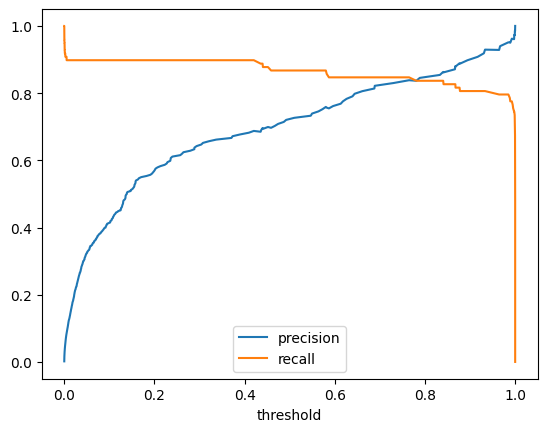

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

thr = pd.read_csv("outputs/tables/threshold_sweep.csv")
thr.plot(x="threshold", y=["precision","recall"])
plt.show()


In [9]:
scored = pd.read_csv("outputs/tables/scored_transactions_sample.csv")
scored.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,label,score
0,-1.953183,-1.958955,-2.722373,0.065636,-2.051588,0.435947,4.509367,0.781314,0.993881,-0.800422,...,-0.064435,1.333293,0.945037,0.535140,-0.381992,-0.126417,0.152883,2.141696,0,2.434060e-07
1,-0.669070,-2.438283,-0.264593,2.889100,3.375535,1.729515,-0.650652,-2.503850,-0.372552,-0.334218,...,0.185701,-2.240295,0.569264,-0.323438,0.390778,0.651110,0.565652,-0.219813,0,4.659923e-05
2,0.287402,-1.318108,1.179453,-1.120372,0.206072,-1.600136,0.452594,2.032534,-3.290388,0.874368,...,0.107648,-2.282402,0.595314,-1.075518,-0.259226,1.031443,0.026284,2.680678,0,3.564338e-04
3,-0.252755,-1.301314,1.216130,1.029738,1.292400,-0.062383,0.015550,0.404308,0.180961,0.073446,...,0.236517,-0.073479,0.084947,-0.144056,-0.293500,-0.369949,-0.079365,-0.272348,0,4.273036e-04
4,1.452958,2.052545,-0.112153,-1.081547,0.416182,-0.177287,-1.146267,0.121181,-0.268025,0.649733,...,-0.734926,0.355477,-0.033057,-0.338042,0.203471,-0.072333,-0.062021,-0.345313,0,3.161765e-08


### Ploting the grid which includes three model runs at different thresholds

    model      balance  threshold  roc_auc  pr_auc  precision_at_threshold  \
0  logreg         none        0.4   0.9573  0.7439                  0.8049   
1  logreg        smote        0.4   0.9698  0.7249                  0.0413   
2  logreg  undersample        0.4   0.9760  0.6778                  0.0298   
3  logreg         none        0.7   0.9573  0.7439                  0.8333   
4  logreg        smote        0.7   0.9698  0.7249                  0.1034   

   recall_at_threshold  f1_at_threshold  
0               0.6735           0.7333  
1               0.9184           0.0790  
2               0.9184           0.0578  
3               0.6122           0.7059  
4               0.8980           0.1855  


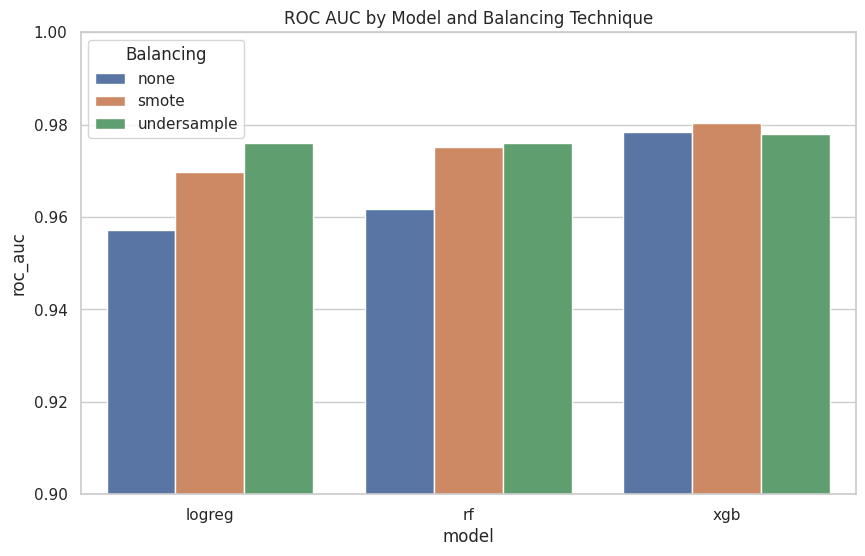

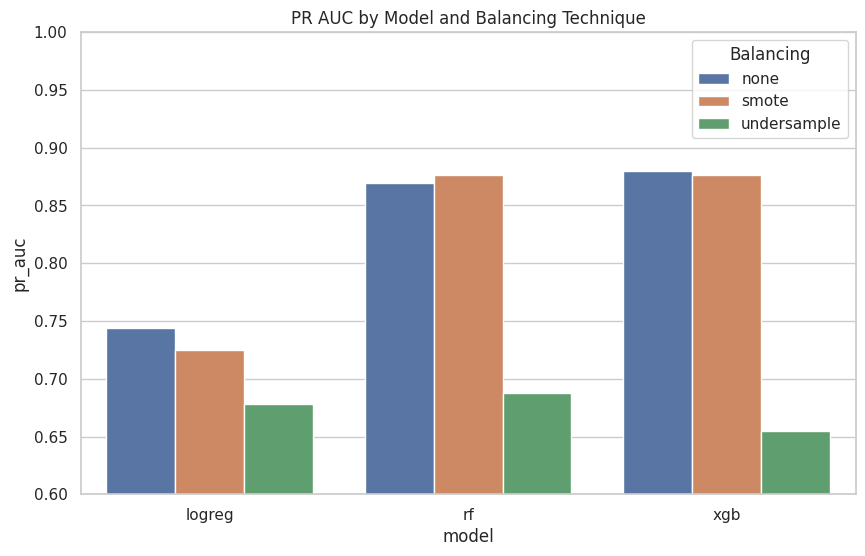

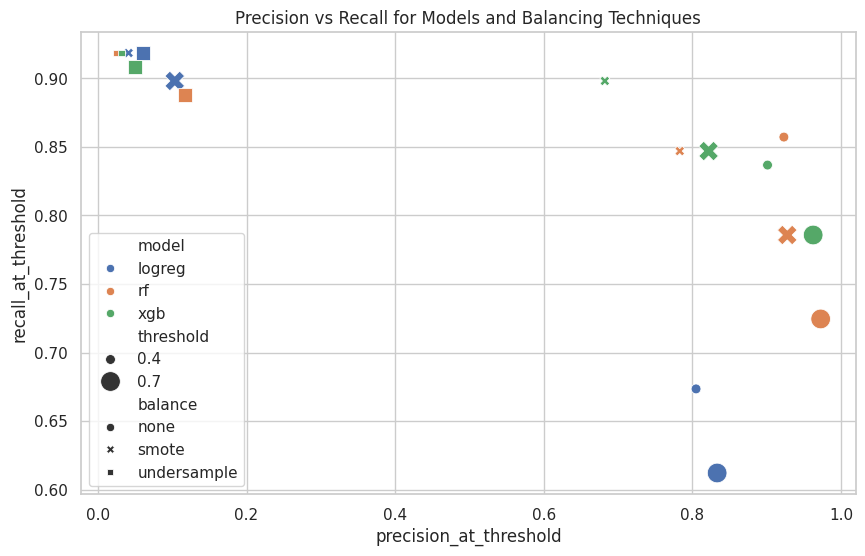

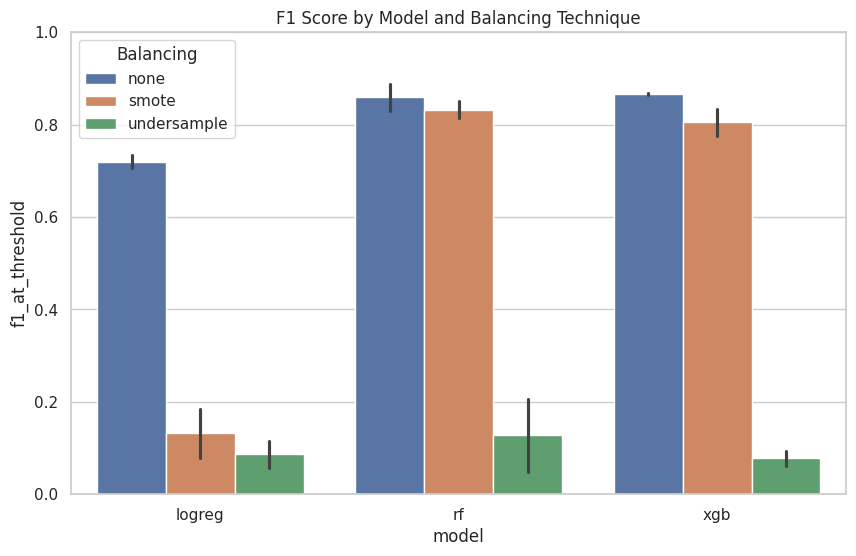

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your CSV file (replace with your actual file path)
df = pd.read_csv("/home/umair/07-Data_Science/08_Jobs-DS/94_Sardine_DS_Aug-11-2025/sardine-fraud-analytics/outputs/tables/kpi_grid.csv")

# Display first few rows to confirm
print(df.head())

# Set Seaborn style
sns.set(style="whitegrid")

# --- 1. Compare ROC AUC across models and balancing techniques ---
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="model", y="roc_auc", hue="balance")
plt.title("ROC AUC by Model and Balancing Technique")
plt.ylim(0.9, 1.0)
plt.legend(title="Balancing")
plt.show()

# --- 2. Compare PR AUC across models and balancing techniques ---
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="model", y="pr_auc", hue="balance")
plt.title("PR AUC by Model and Balancing Technique")
plt.ylim(0.6, 1.0)
plt.legend(title="Balancing")
plt.show()

# --- 3. Precision vs Recall at Threshold ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="precision_at_threshold",
    y="recall_at_threshold",
    hue="model",
    style="balance",
    size="threshold",
    sizes=(50, 200)
)
plt.title("Precision vs Recall for Models and Balancing Techniques")
plt.show()

# --- 4. F1 Score comparison ---
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="model", y="f1_at_threshold", hue="balance")
plt.title("F1 Score by Model and Balancing Technique")
plt.ylim(0, 1.0)
plt.legend(title="Balancing")
plt.show()


Implemented and evaluated multiple supervised ML models (Logistic Regression, Random Forest, XGBoost) and an unsupervised model (Isolation Forest) for financial fraud detection using the Kaggle credit card dataset. Applied class imbalance handling (SMOTE, undersampling) and tuned probability thresholds. Selected XGBoost + SMOTE (threshold=0.7) for deployment due to its superior balance between recall (0.8469) and precision (0.8218), achieving ROC_AUC of 0.9804 and PR_AUC of 0.8763.